In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage
import scipy.ndimage.filters as filters
import cv2

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(float)/255)[:, :, :3]

def get_gaussian_filter(n, sigma=1):
    assert(n % 2 == 1)
    h = (n + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Take the gaussian
    g = np.exp(-d_sq/2/(sigma**2))
    # Normalize
    g = g/g.sum().sum()
    return g

def get_local_maxima(data, threshold, do_return_values=False):
    # See: https://stackoverflow.com/a/9113227/3672986
    neighborhood_size = 3

    data_region_max = scipy.ndimage.maximum_filter(data, neighborhood_size)
    maxima = (data == data_region_max)
    data_min = scipy.ndimage.minimum_filter(data, neighborhood_size)
    maxima[data < threshold] = 0

    labeled, num_objects = scipy.ndimage.label(maxima)
    slices = scipy.ndimage.find_objects(labeled)
    x, y, r = [], [], []
    for dy, dx in slices:
        x_center = int(round((dx.start + dx.stop - 1)/2))
        x.append(x_center)
        y_center = int(round((dy.start + dy.stop - 1)/2))   
        y.append(y_center)
        r.append(data[y_center, x_center])
        
    if do_return_values:
        return np.array(list(zip(x, y))), r
    else:
        return np.array(list(zip(x, y,)))


ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [2]:
# SOLUTION

def get_gaussian_filter(n, sigma=1):
    assert(n % 2 == 1)
    h = (n + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Take the gaussian
    g = np.exp(-d_sq/2/(sigma**2))
    # Normalize
    g = g/g.sum().sum()
    return g

def get_harris_components(image, weights):
    sobel_x = np.array([
      [1, 0, -1],
      [2, 0, -2],
      [1, 0, -1]
    ])

    sobel_y = np.array([
      [1, 2, 1],
      [0, 0, 0],
      [-1, -2, -1]
    ])

    Ix = scipy.signal.convolve(
        image, sobel_x, mode='same')
    Iy = scipy.signal.convolve(
        image, sobel_y, mode='same')

    # Compute the Harris operator matrix
    w = weights
    A = scipy.signal.convolve(
        Ix * Ix, w, mode='same')
    B = scipy.signal.convolve(
        Ix * Iy, w, mode='same')
    C = scipy.signal.convolve(
        Iy * Iy, w, mode='same')
    return (A, B, C)

def get_harris_score(image, weights):
    A, B, C = get_harris_components(image, weights)
    det = A*C - B*B
    tr = A + C
    f = det/tr
    return f


In [3]:
# SOLUTION: Answers to C, D, E
# Using the alternate "trace" definition of the scoring
# function does a good job at detecting *all* edges, which 
# makes it a poor corner detector. I have included code 
# that computes and plots this function below:

def get_harris_score_trace(image, weights):
    A, B, C = get_harris_components(image, weights)
    return A + C



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

def get_circ_image(image_size, radius):
    """Create an image of width `image_size` with a circle 
    of radius `radius` in its center."""
    assert(image_size % 2 == 1)
    h = (image_size + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Threshold by squared radius
    d_sq = (d_sq <= radius**2).astype(float)
    return d_sq

def get_LoG_filter(kernel_size, sigma):
    raise NotImplementedError("Your task is to implement the LoG filter.")

def apply_filter(signal, filt):
    """Apply a filter to an image; wrapper around scipy."""
    return scipy.signal.convolve2d(signal, filt, mode='same')


In [5]:
# SOLUTION

def get_LoG_filter(kernel_size, sigma):
    assert(kernel_size % 2 == 1)
    h = (kernel_size + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Implement the filter
    log = (1 - d_sq/2/(sigma**2)) * np.exp(-d_sq/2/(sigma**2)) / (sigma**2)
    return log


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage


def plot_circ_features(image, features, ax):
    ax.imshow(image, cmap='gray')
    for m in features:
        # if m[2] == sigmas.max():
        #     continue
        radius = None
        if radius is None:
            raise NotImplementedError()
        cir = plt.Circle((m[0], m[1]), radius, color='r', fill=False)
        ax.add_artist(cir)
        
def get_local_maxima_3D(data, threshold, sigmas, neighborhood_size=5):
    # See: https://stackoverflow.com/a/9113227/3672986
    data_region_max = scipy.ndimage.maximum_filter(data, neighborhood_size)
    maxima = (data == data_region_max)
    data_min = scipy.ndimage.minimum_filter(data, neighborhood_size)
    maxima[data < threshold] = 0

    labeled, num_objects = scipy.ndimage.label(maxima)
    slices = scipy.ndimage.find_objects(labeled)

    features = []
    x, y = [], []
    for dy, dx, dz in slices:
        x_center = int(round((dx.start + dx.stop - 1)/2))
        y_center = int(round((dy.start + dy.stop - 1)/2))
        z_center = int(round((dz.start + dz.stop - 1)/2))
        features.append((x_center, y_center, sigmas[z_center]))
        
    return features
    
def compute_multi_scale_features(image, sigmas, threshold, window_size=11):
    raise NotImplementedError()


In [7]:
# SOLUTION

import matplotlib.pyplot as plt

def get_LoG_filter(kernel_size, sigma):
    assert(kernel_size % 2 == 1)
    h = (kernel_size + 1)//2
    d = np.arange(h)
    d = np.concatenate((d[::-1], d[1:]))
    d = d[:, np.newaxis]
    d_sq = d**2 + d.T ** 2
    # Implement the filter
    log = (1 - d_sq/2/(sigma**2)) * np.exp(-d_sq/2/(sigma**2)) / (sigma**2)
    return log

def plot_circ_features(image, features, ax):
    ax.imshow(image, cmap='gray')
    for m in features:
        # if m[2] == sigmas.max():
        #     continue
        cir = plt.Circle((m[0], m[1]), np.sqrt(2)*m[2], color='r', fill=False)
        ax.add_artist(cir)

def compute_multi_scale_features(image, sigmas, threshold, window_size=11):
    response = np.zeros(
        [image.shape[0], image.shape[1], sigmas.size]
    )
    for ii, sigma in enumerate(sigmas):
        w = get_LoG_filter(201, sigma=sigma)
        feature_response = scipy.signal.convolve(
            image, w, mode='same')
        response[:, :, ii] = np.abs(feature_response)
    
    return get_local_maxima_3D(response, threshold, sigmas=sigmas,
                             neighborhood_size=window_size)


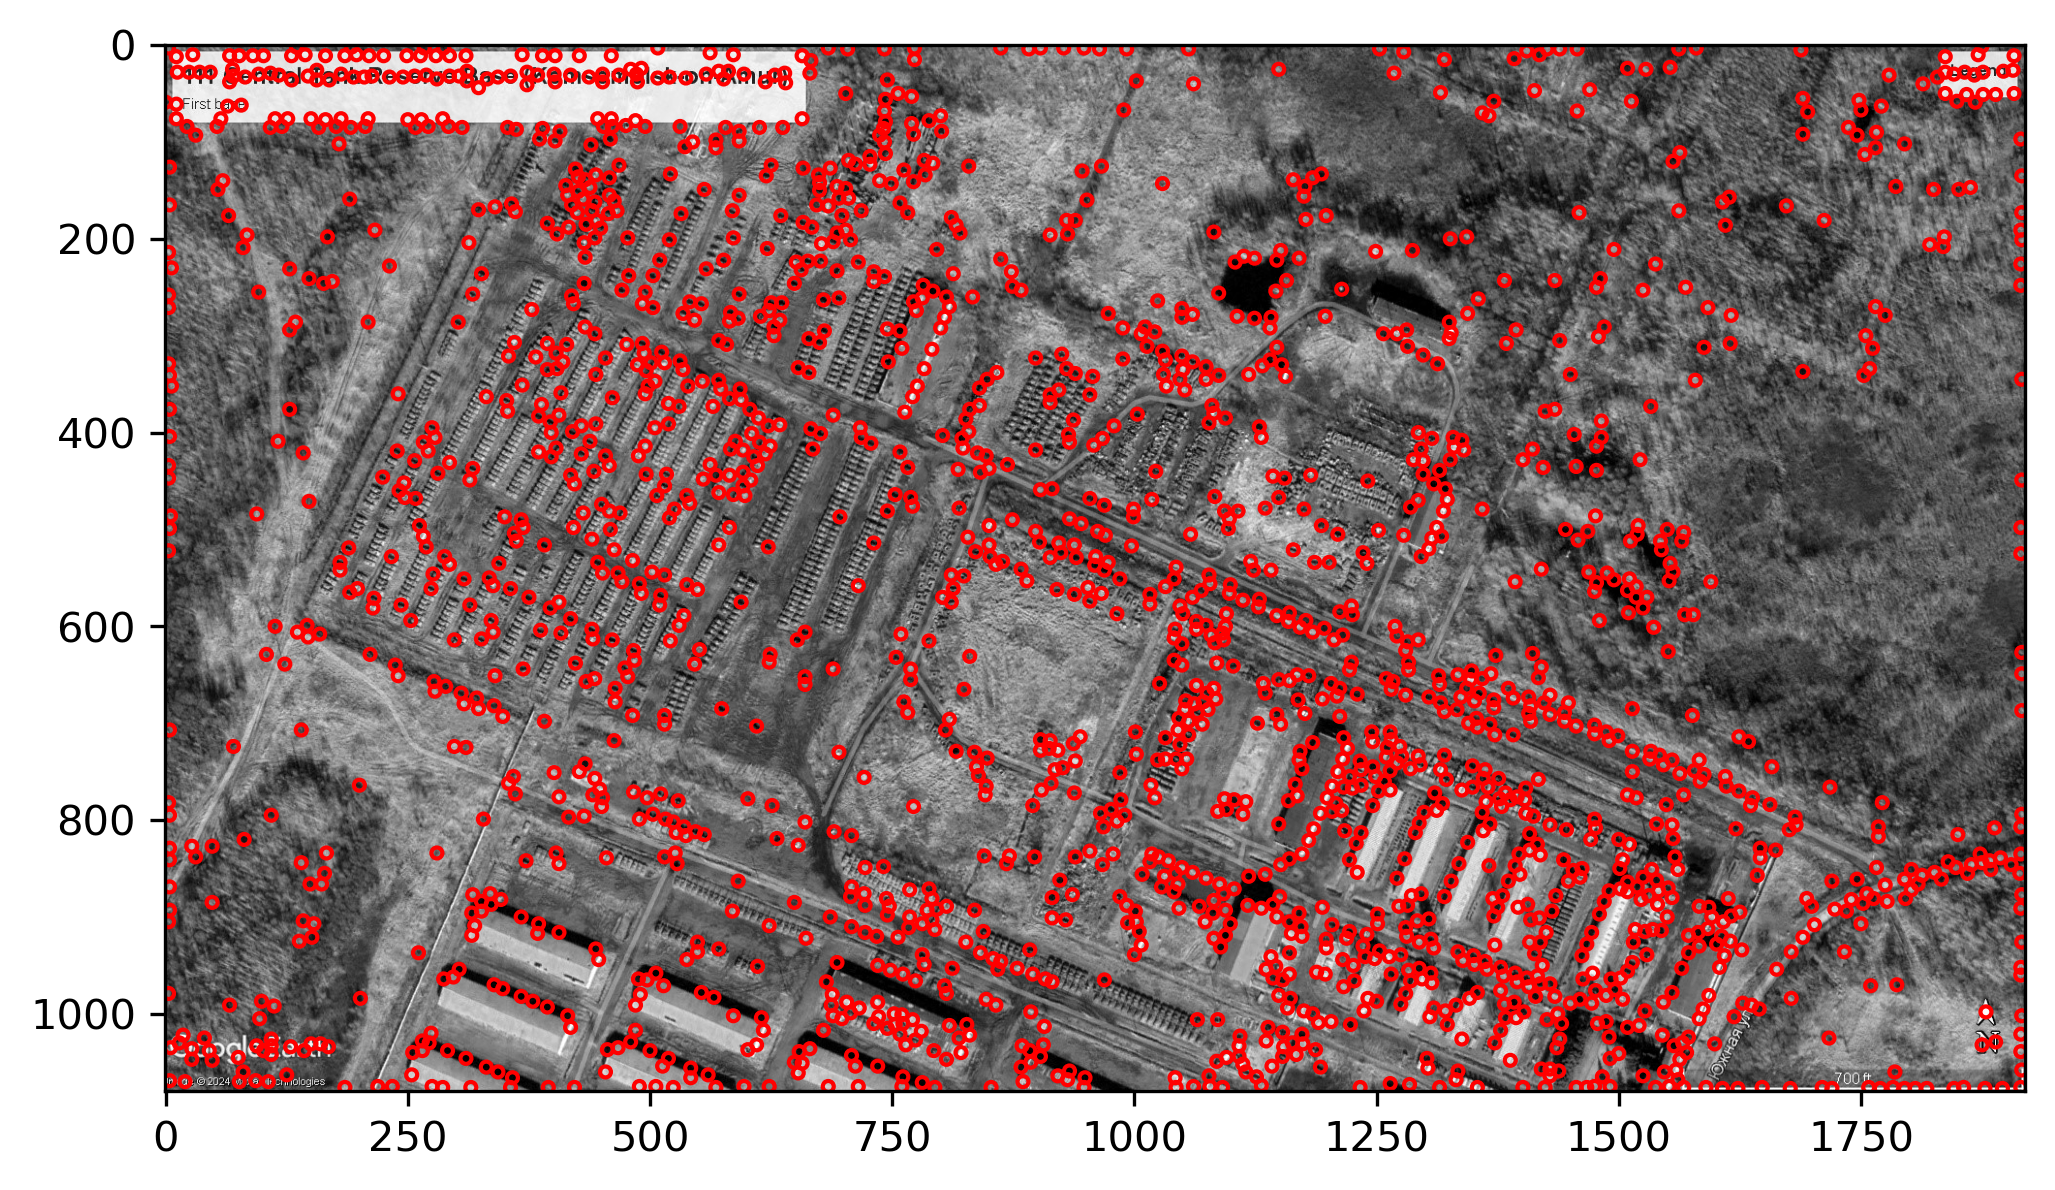

In [8]:
# Feature response as a function of sigma 
# (you may replace with an image you chose)
image_base = load_image("111 Central Tank Reserve Base.jpg")[:, :, 0]
sigmas = np.array([4.0])
features = compute_multi_scale_features(image_base, sigmas, 0.4)
fig = plt.figure(figsize=(8, 8), dpi=300)
plot_circ_features(image_base, features, plt.gca())

In [9]:
def get_features_with_descriptors(image,
                                  corners,
                                  compute_descriptor_fn, 
                                  patch_half_width=7):
    features = []
    for c in corners:
        patch = image[c[1]-patch_half_width:c[1]+patch_half_width+1,
                      c[0]-patch_half_width:c[0]+patch_half_width+1]
        
        if patch.size < (2*patch_half_width + 1) ** 2:
            continue
        features.append({
            'x': c[0],
            'y': c[1],
            'patch': patch,
            'descriptor': compute_descriptor_fn(patch),
        })
    
    return features



def compute_descriptor_match(patch):
    return (patch - np.mean(patch)) / np.std(patch)

def compute_descriptor_binary_x(patch):
    return 2 * ((patch[:-1] - patch[1:]) > 0).astype(float) - 1

def compute_descriptor_hist(patch):
    return np.sqrt(np.histogram(patch, bins=8, range=(0.0, 1.0))[0])



def compare_descriptors(fa, fb):
    return np.sum(fa['descriptor'] * fb['descriptor'])

def compute_feature_matches(fsa, fsb):
    sims = np.zeros((len(fsa), len(fsb)), dtype=float)
    for ii, fa in enumerate(fsa):
        for jj, fb in enumerate(fsb):
            sims[ii, jj] = compare_descriptors(fa, fb)

    # Now compute the matches
    matches = []
    for ii in range(len(fsa)):
        mi = np.argmax(sims[ii])
        if not ii == np.argmax(sims[:, mi]):
            continue
        match_score = sims[ii, mi]
        matches.append([fsa[ii]['x'],
                        fsa[ii]['y'],
                        fsb[mi]['x'],
                        fsb[mi]['y']])

    return matches

In [10]:
import cv2

def find_image_patch(image, patch):
    sift = cv2.SIFT_create()

    keypoints_image, descriptors_image = sift.detectAndCompute(image, None)
    keypoints_patch, descriptors_patch = sift.detectAndCompute(patch, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(descriptors_patch, descriptors_image, k=2)

    patch_coordinates = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            patch_coordinates.append(keypoints_image[m.trainIdx].pt)

    return patch_coordinates

larger_image = cv2.imread('111 Central Tank Reserve Base.jpg', cv2.IMREAD_GRAYSCALE)
image_patch = cv2.imread('bmp.jpg', cv2.IMREAD_GRAYSCALE)

patch_coordinates = find_image_patch(larger_image, image_patch)

if patch_coordinates is not None:
    print("Image patch found at coordinates:", patch_coordinates)

    plt.figure(dpi=300)
    plt.imshow(larger_image, cmap='gray')
    x_coordinates = [point[0] for point in patch_coordinates]
    y_coordinates = [point[1] for point in patch_coordinates]
    plt.plot(x_coordinates, y_coordinates, '.r', color='r')
else:
    plt.figure(dpi=300)
    plt.imshow(larger_image, cmap='gray')

ImportError: DLL load failed while importing cv2: The specified module could not be found.

Image patch found at coordinates: [(736, 51), (737, 51), (738, 51), (739, 51), (740, 51), (741, 51), (742, 51), (736, 52), (737, 52), (738, 52), (739, 52), (740, 52), (741, 52), (742, 52), (736, 53), (737, 53), (738, 53), (739, 53), (740, 53), (741, 53), (742, 53), (736, 54), (737, 54), (743, 54), (744, 54), (745, 54), (746, 54), (747, 54), (738, 55), (739, 55), (740, 55), (741, 55), (742, 55), (738, 56), (739, 56), (740, 56), (741, 56), (742, 56), (738, 57), (739, 57), (740, 57), (741, 57), (742, 57), (738, 58), (739, 58), (740, 58), (741, 58), (742, 58), (738, 59), (739, 59), (740, 59), (741, 59), (742, 59), (734, 71), (739, 71), (740, 71), (741, 71), (742, 71), (743, 71), (744, 71), (745, 71), (741, 72), (742, 72), (743, 72), (744, 72), (745, 72), (741, 73), (742, 73), (743, 73), (744, 73), (745, 73), (1756, 73), (1757, 73), (1758, 73), (741, 74), (742, 74), (743, 74), (744, 74), (745, 74), (1740, 77), (1740, 78), (1740, 79), (1740, 80), (1740, 81), (1740, 82), (1736, 83), (1737, 83

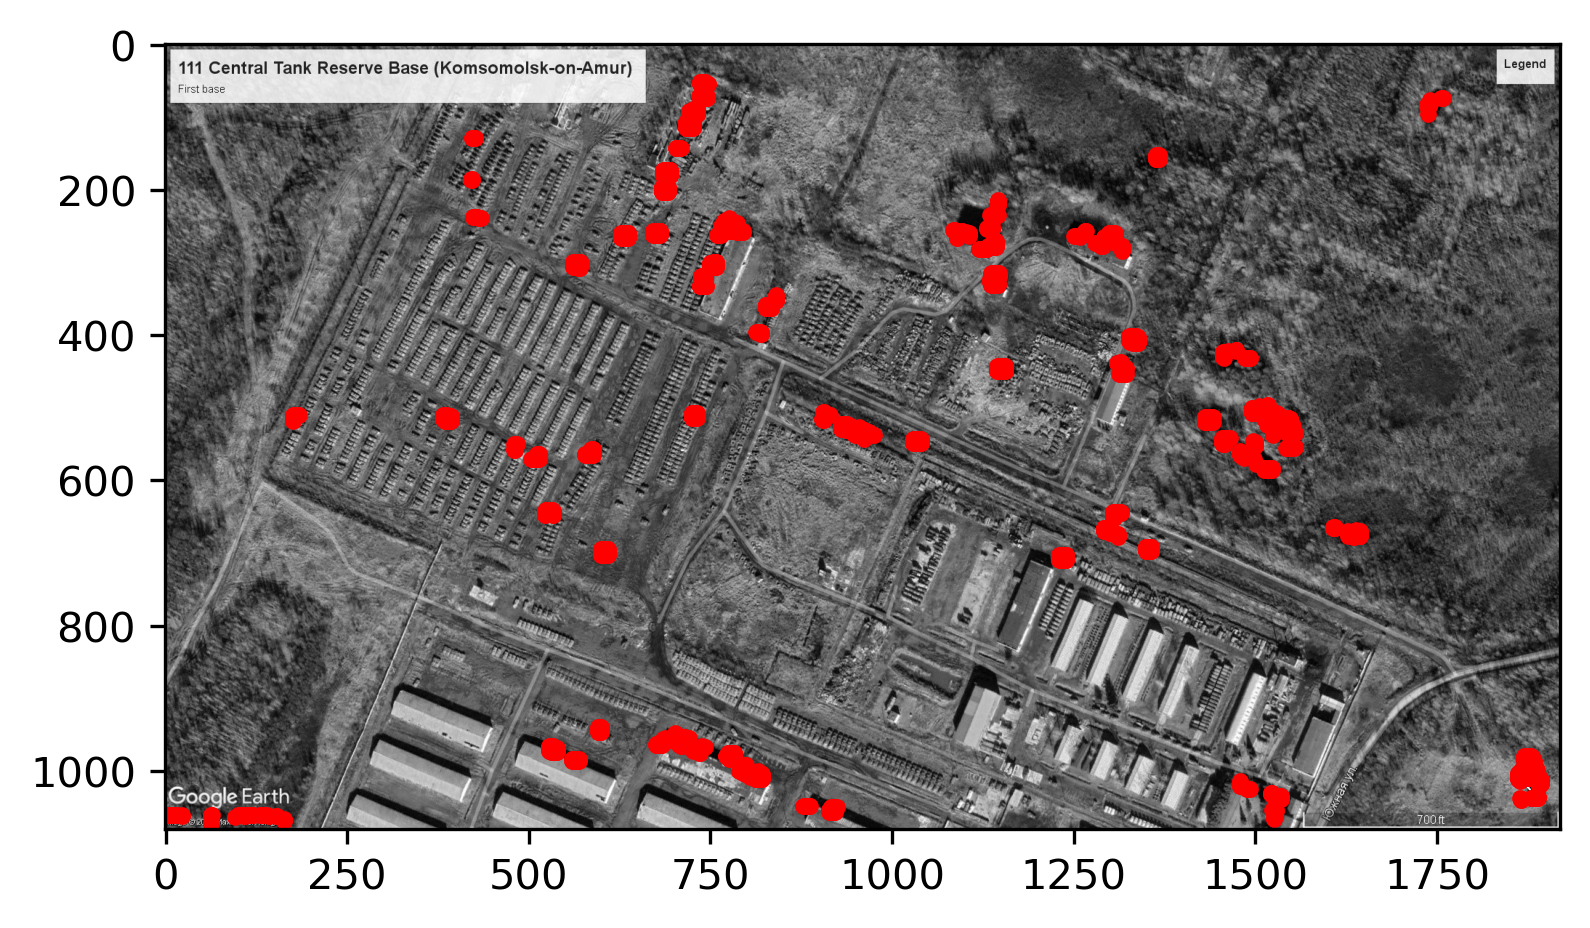

In [ ]:
def find_image_patch(image, patch):
    patch_coordinates = []
    image_height, image_width = image.shape[:2]
    patch_height, patch_width = patch.shape[:2]

    patch_hist = np.sqrt(np.histogram(patch, bins=8, range=(0.0, 1.0))[0])

    for y in range(image_height - patch_height + 1):
        for x in range(image_width - patch_width + 1):
            window = image[y:y+patch_height, x:x+patch_width]

            window_hist = np.sqrt(np.histogram(window, bins=8, range=(0.0, 1.0))[0])

            if np.array_equal(patch_hist, window_hist):
                patch_coordinates.append((x, y))

    return patch_coordinates

larger_image = cv2.imread('111 Central Tank Reserve Base.jpg', cv2.IMREAD_GRAYSCALE)
image_patch = cv2.imread('bmp_unrotated.jpg', cv2.IMREAD_GRAYSCALE)

patch_coordinates = find_image_patch(larger_image, image_patch)

if patch_coordinates is not None:
    print("Image patch found at coordinates:", patch_coordinates)

    plt.figure(dpi=300)
    plt.imshow(larger_image, cmap='gray')
    x_coordinates = [point[0] for point in patch_coordinates]
    y_coordinates = [point[1] for point in patch_coordinates]
    plt.plot(x_coordinates, y_coordinates, '.r', color='r')
else:
    plt.figure(dpi=300)
    plt.imshow(larger_image, cmap='gray')

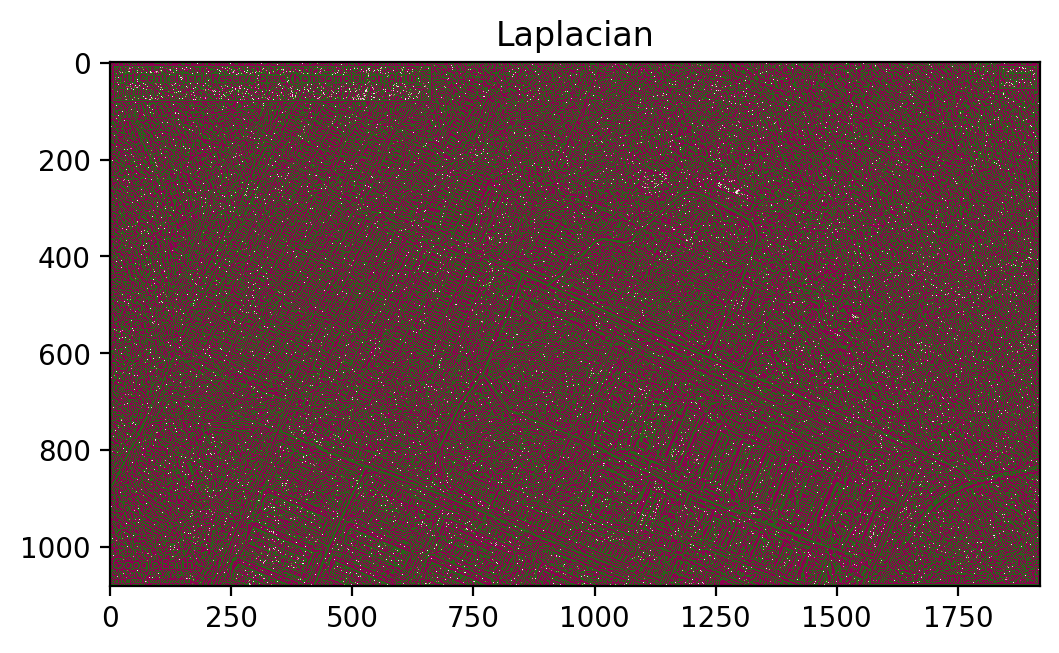

In [ ]:
## SOLUTION
#load
larger_image = cv2.imread('111 Central Tank Reserve Base.jpg', cv2.IMREAD_GRAYSCALE)

#blur


#log
# There are two accepted 3x3 Laplacian filters (or, really any linear combination of these will do)
laplacian_filter = [
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
]
laplacian_filter_alt = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]

laplacian_image = scipy.signal.convolve(
    larger_image, laplacian_filter_alt, mode='same')

plt.figure(dpi=200)
plt.imshow(laplacian_image, cmap='PiYG', vmin=-0.5, vmax=0.5)
plt.title("Laplacian")

None

Text(0.5, 1.0, 'Gradient Magnitude')

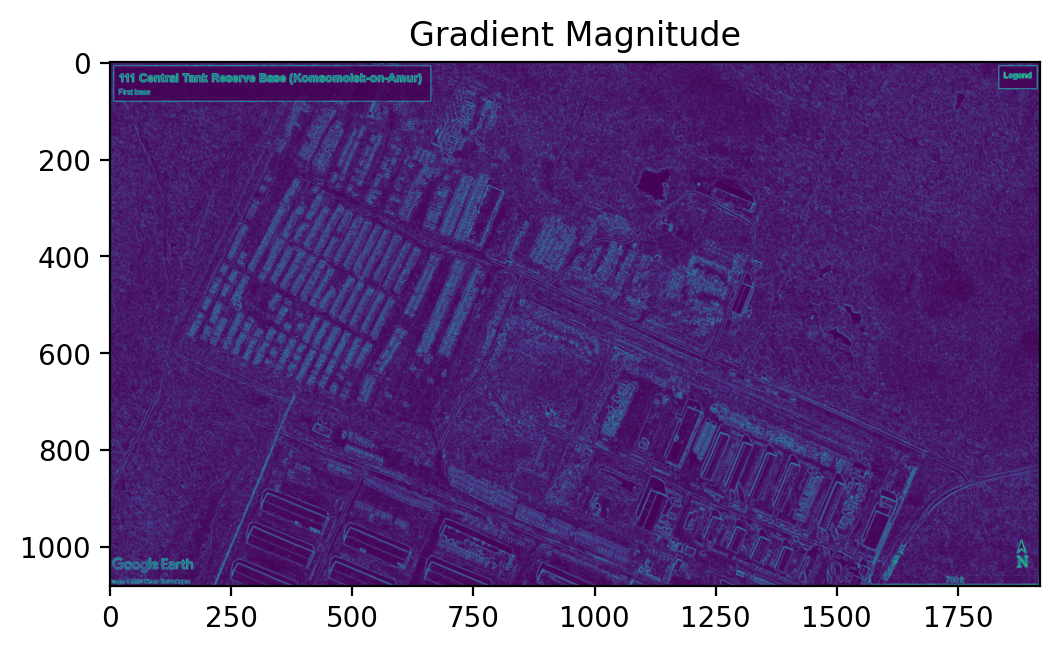

In [ ]:
# Solution

sobel_x = np.array([
      [1, 0, -1],
      [2, 0, -2],
      [1, 0, -1]
])

sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

Ix = scipy.signal.convolve(
    larger_image, sobel_x, mode='same')
Iy = scipy.signal.convolve(
    larger_image, sobel_y, mode='same')
gradient_magnitude = np.sqrt(Iy**2 + Ix**2)
gradient_angle = np.arctan2(Iy, Ix)


plt.figure(dpi=200)
plt.imshow(gradient_magnitude, cmap='viridis')
plt.title("Gradient Magnitude")

Taking down points

In [1]:
clicked_points = []

#mouse callback
def mouse_callback(event, x, y, flags, param):
    global clicked_points
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))
        print("Clicked at (x={}, y={})".format(x, y))
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)  # Draw smaller red circle at clicked point
        cv2.imshow('image', image)

#load image
image = cv2.imread('1311 Central Tank Reserve Base.jpg')
cv2.imshow('image', image)
cv2.setMouseCallback('image', mouse_callback)

#quit
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

#write to file
with open('clicked_coordinates.txt', 'w') as f:
    for point in clicked_points:
        f.write('{} {}\n'.format(point[0], point[1]))

cv2.destroyAllWindows()

NameError: name 'cv2' is not defined